In [ ]:
%load_ext rpy2.ipython

import vip.benchmark

In [ ]:
opt_trace, fitting_results = vip.benchmark.fixed(
    "../_ignore/mb/DS1", 
    model_name="lognormal", 
    step_count = 10, 
    particle_count = 100
)

In [ ]:
%%R -i opt_trace -w 800 -h 400 -u px

suppressMessages(library("ggplot2"))
suppressMessages(library("cowplot"))

normal = ggplot(opt_trace) + 
    theme_minimal() +
    geom_line(aes(x=index, y=elbo))

zoomed = ggplot(tail(opt_trace, nrow(opt_trace)/3)) + 
    theme_minimal() +
    geom_line(aes(x=index, y=elbo))

plot_grid(normal, zoomed, nrow=2)

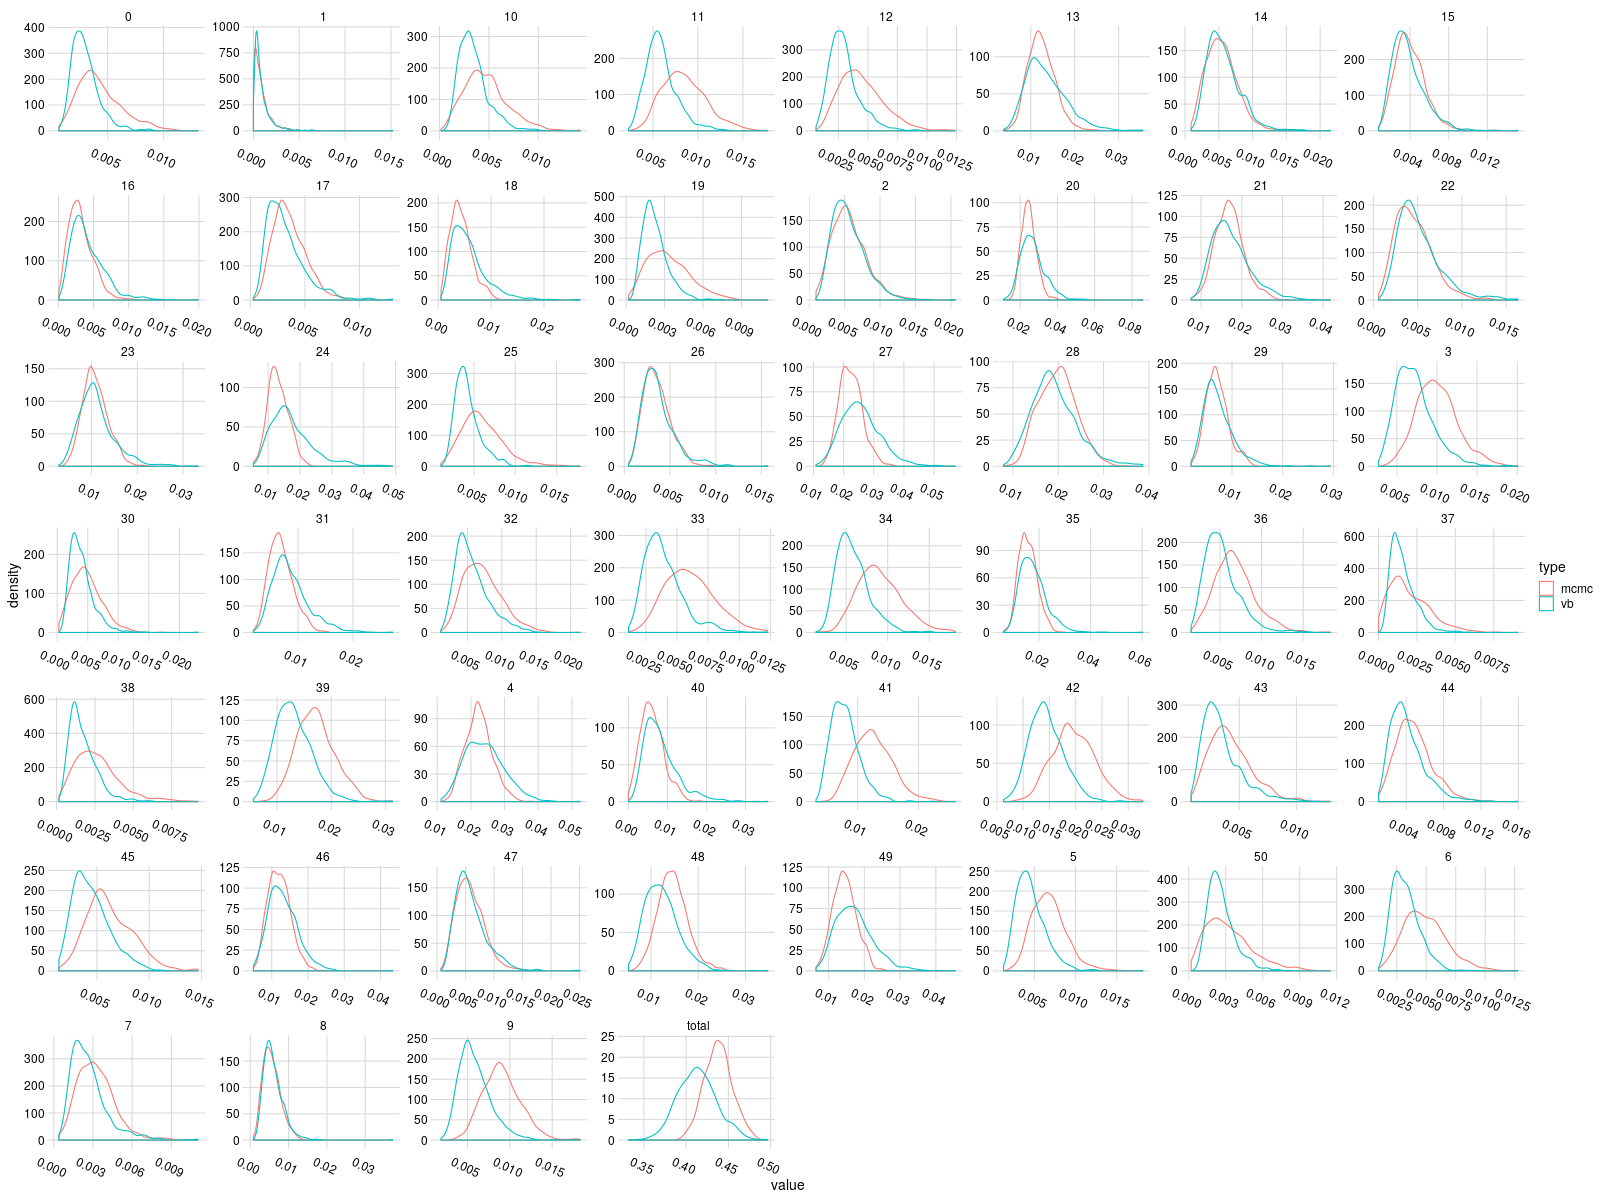

In [4]:
%%R -i fitting_results -w 1600 -h 1200 -u px

suppressMessages(library("ggplot2"))
suppressMessages(library("cowplot"))

ggplot(fitting_results) + 
    theme_minimal_grid() +
    theme(axis.text.x = element_text(angle = -25)) +
    geom_density(aes(value, color=type)) +
    facet_wrap("variable", scales="free")